In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_wr = pd.read_csv('wechselrichter.csv')

df_wr.head()

,inv_name,def_date,def_time,pac,meta_upload_date
0,wr01,06.03.20,00:00:00,0,20200306
1,wr01,06.03.20,00:05:00,0,20200306
2,wr01,06.03.20,00:10:00,0,20200306
3,wr01,06.03.20,00:15:00,0,20200306
4,wr01,06.03.20,00:20:00,0,20200306


In [3]:
df_s = pd.read_csv('sensor.csv')

df_s.head()

,inv_name,def_date,def_time,solirr,tmpmod,meta_upload_date
0,senorostwind,02.03.20,00:00:00,0,7,20200302
1,senorostwind,02.03.20,00:05:00,0,7,20200302
2,senorostwind,02.03.20,00:10:00,0,7,20200302
3,senorostwind,02.03.20,00:15:00,0,7,20200302
4,senorostwind,02.03.20,00:20:00,0,7,20200302


In [4]:
df_s.inv_name.unique()

array(['senorostwind', 'senorwest'], dtype=object)

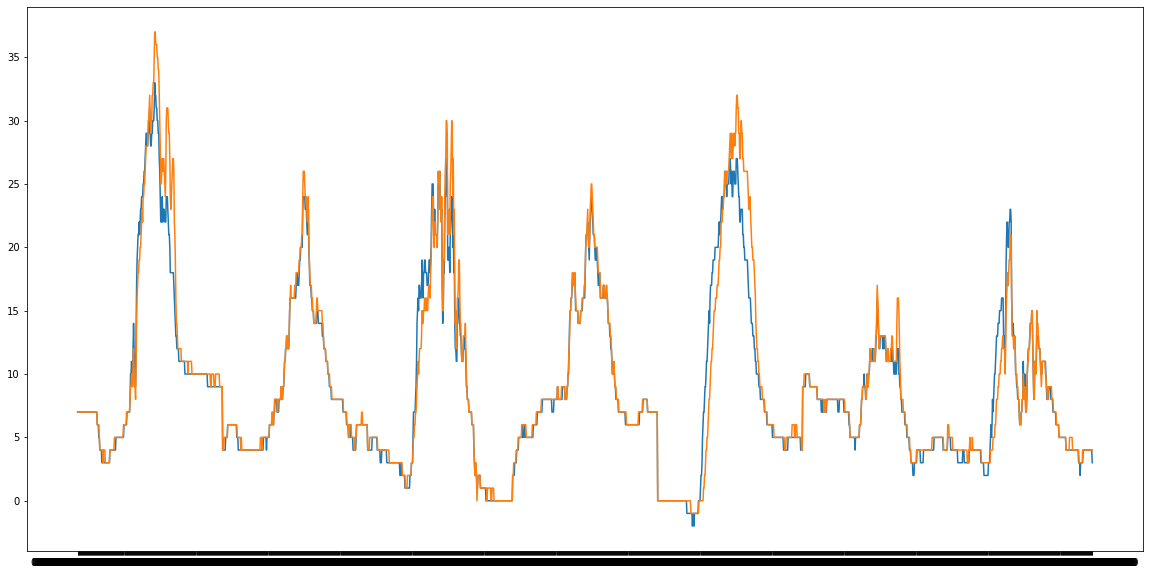

In [22]:
y = df_s[df_s.inv_name=='senorostwind']['tmpmod']
x = df_s[df_s.inv_name=='senorostwind']['date']

y2 = df_s[df_s.inv_name=='senorwest']['tmpmod']
x2 = df_s[df_s.inv_name=='senorwest']['date']
plt.figure(figsize=(20,10))
plt.plot(x, y, label = "line 1")
plt.plot(x2, y2, label = "line 2")
plt.show()

In [6]:
df_s[df_s.inv_name=='senorwest']['tmpmod'].mean(), df_s[df_s.inv_name=='senorostwind']['tmpmod'].mean()

(9.22718253968254, 8.958333333333334)

In [162]:
df_wr.groupby('inv_name')['pac'].max()

inv_name
wr01    12226
wr02    12323
wr03    12002
wr04    12051
wr05    13713
wr06     8581
wr07     8645
Name: pac, dtype: int64

In [7]:
df_wr.groupby(['inv_name', 'def_date'])['pac'].sum()

inv_name  def_date
wr01      01.03.20    277107
          02.03.20    674026
          03.03.20    322725
          04.03.20    594426
          05.03.20    807383
          06.03.20    298159
          07.03.20    365778
wr02      01.03.20    279358
          02.03.20    678616
          03.03.20    326321
          04.03.20    596533
          05.03.20    813738
          06.03.20    300683
          07.03.20    366629
wr03      01.03.20    278222
          02.03.20    664781
          03.03.20    323171
          04.03.20    591918
          05.03.20    801712
          06.03.20    299086
          07.03.20    373693
wr04      01.03.20    280397
          02.03.20    672144
          03.03.20    325619
          04.03.20    595975
          05.03.20    809865
          06.03.20    298144
          07.03.20    373200
wr05      01.03.20    330250
          02.03.20    682196
          03.03.20    387430
          04.03.20    618156
          05.03.20    800193
          06.03.20    35

In [8]:
df_s['date'] = df_s.def_date + ' ' + df_s.def_time

<AxesSubplot:xlabel='date'>

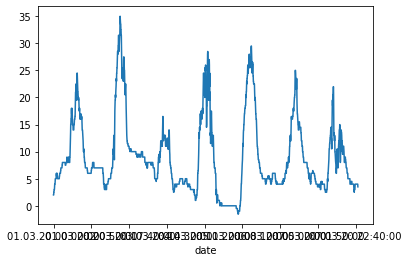

In [20]:
df_s.groupby('date')['tmpmod'].mean().plot()

In [21]:
df_s.groupby('date')['tmpmod'].mean()

date
01.03.20 00:00:00    2.0
01.03.20 00:05:00    2.0
01.03.20 00:10:00    2.5
01.03.20 00:15:00    2.5
01.03.20 00:20:00    3.0
                    ... 
07.03.20 23:35:00    4.0
07.03.20 23:40:00    4.0
07.03.20 23:45:00    4.0
07.03.20 23:50:00    4.0
07.03.20 23:55:00    3.5
Name: tmpmod, Length: 2016, dtype: float64

In [9]:
d = df_s.groupby('date')['tmpmod'].mean().to_dict()
d2 = df_s.groupby('date')['solirr'].mean().to_dict()

In [10]:
df_wr['date'] = df_wr.def_date + ' ' + df_wr.def_time

In [11]:
df_wr['tmpmod'] = df_wr['date'].map(d)
df_wr['solirr'] = df_wr['date'].map(d2)

In [12]:
d3 = (df_wr.groupby('inv_name')['pac'].max()/150).to_dict()
df_wr['area'] = df_wr['inv_name'].map(d3)

In [13]:
tkoef  = 0.004

In [19]:
df_wr['p_gues'] = df_wr.solirr * (df_wr.area / 4) * (1 + tkoef * (df_wr.tmpmod - 25))

#df_wr['st'] = (1 + tkoef * (df_wr.tmpmod - 25))

#df_wr['t'] = df_wr.tmpmod - 25
#df_wr[df_wr.inv_name == 'wr01'][['p_ges', 'pac', 'st', 't', 'def_time']]


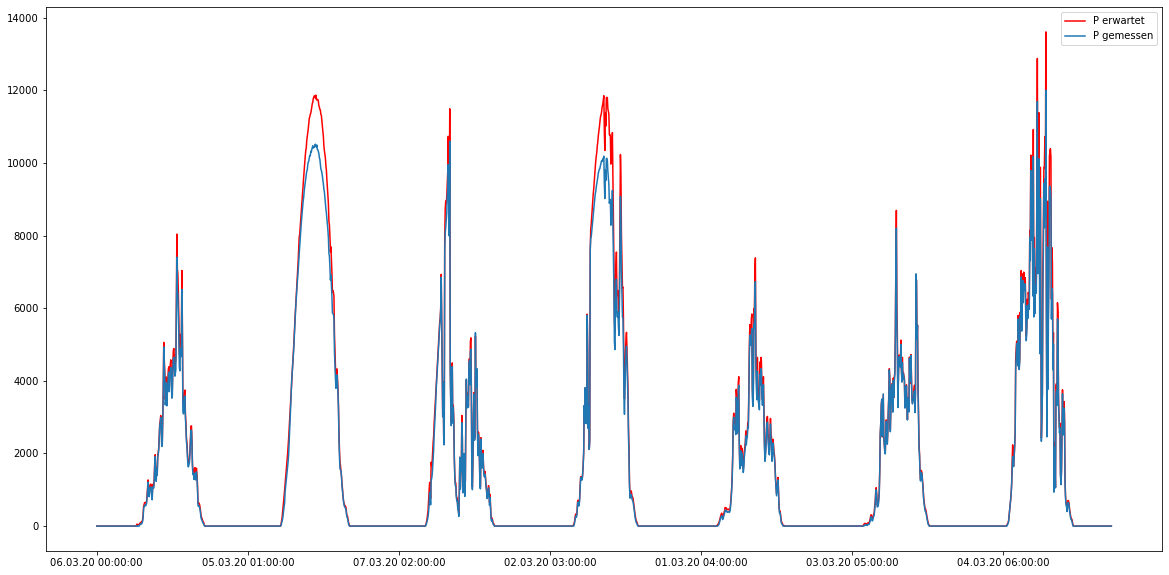

In [18]:
y = df_wr[df_wr.inv_name == 'wr03']['p_gues']
x = df_wr[df_wr.inv_name == 'wr03']['date']

y2 = df_wr[df_wr.inv_name == 'wr03']['pac']
x2 = df_wr[df_wr.inv_name == 'wr03']['date']
plt.figure(figsize=(20, 10))
plt.plot(x, y, label="P erwartet", color='red')
plt.plot(x2, y2, label="P gemessen")
plt.xticks(x[::300])
#plt.xticklabels(x[::3000], rotation=45)
plt.legend()
plt.show()

In [204]:
df = df_wr

In [207]:
df.drop(columns=['date', 'tmpmod', 'solirr', 'st','t','area'], inplace=True)

In [208]:
df.to_csv('output_jm.csv', index=False)

In [209]:
df.to_json('output_jm.json', orient='table')